### Дополнительное задание для работы с курсовым проектом:

__(Необязательно выполнять, но очень желательно)__

Скачать данные из соревнования. Считать их.

In [1]:
import pandas as pd
import numpy as np

RE=pd.read_csv('train.csv', sep=',')

In [5]:
RE.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [41]:
RE.LifeSquare.describe()

count    10000.000000
mean        35.380067
std         16.050730
min          0.370619
25%         25.527399
50%         32.781260
75%         41.415441
max        263.542020
Name: LifeSquare, dtype: float64

In [40]:
RE.Healthcare_1.describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

In [7]:
import seaborn as sns

In [11]:
?sns.boxplot

<AxesSubplot:xlabel='LifeSquare'>

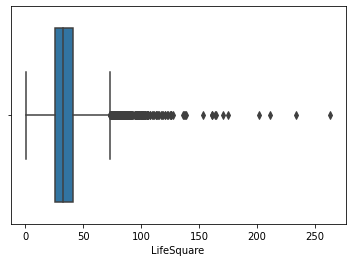

In [36]:
sns.boxplot(x=RE['LifeSquare'],whis=2)

In [29]:
RE[~RE.LifeSquare.isna()].sort_values(by='LifeSquare').LifeSquare.tail(20)

7879    125.306808
5764    125.486563
3955    125.650178
286     125.806981
5631    127.477137
9767    136.215499
8055    136.697187
1614    138.004600
6209    138.910187
730     153.685835
6030    161.155275
3204    161.504222
5712    164.153360
6450    164.526757
8872    170.713651
5283    174.837082
1776    201.627361
7644    211.231125
1906    233.949309
357     263.542020
Name: LifeSquare, dtype: float64

In [30]:
RE.LifeSquare.median()

32.781260192155735

In [31]:
RE.loc[RE.LifeSquare > 300, 'LifeSquare'] = RE.LifeSquare.median()

In [34]:
RE.loc[RE.LifeSquare.isna(), 'LifeSquare'] = RE.LifeSquare.median()

<AxesSubplot:xlabel='Healthcare_1'>

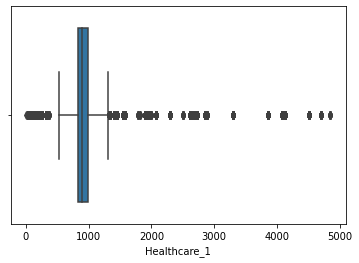

In [46]:
sns.boxplot(x=RE.Healthcare_1,whis=2)

Заполните пропущенные значения в датасете медианами или модами.

In [43]:
RE[~RE.Healthcare_1.isna()].sort_values(by='Healthcare_1').Healthcare_1.tail(20)

7827    4702.0
3301    4702.0
2648    4702.0
5839    4702.0
4699    4702.0
9637    4849.0
2844    4849.0
5028    4849.0
2852    4849.0
777     4849.0
6455    4849.0
2213    4849.0
7841    4849.0
1761    4849.0
9464    4849.0
5838    4849.0
4234    4849.0
9181    4849.0
5236    4849.0
7060    4849.0
Name: Healthcare_1, dtype: float64

In [44]:
RE.Healthcare_1.median()

900.0

In [45]:
RE.loc[RE.Healthcare_1.isna(), 'Healthcare_1'] = RE.Healthcare_1.median()

Разбейте датасет из train.csv на обучающий и валидационный наборы данных.

Переведите строковый признак в числовое представление.

Обучите линейную модель. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

Обучите более сложную модель на ваш выбор. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

Подберите оптимальные гиперпараметры для вашей модели. Пытайтесь улучшить её качество на двух наборах данных.